# DS 5220 Problem Set 1: Regression (Spring 2021)
**Instructor:** Roi Yehoshua
<br>
**Student name:** Weiwei Liu (001404153)
<br>

## Regularized Linear Regression

### 1. Prove the colsed-form equation of the vector $\mathbf{w}$ that minimizes $J(\mathbf{w})$:

Since

$
\mathbf{X} = 
 \begin{pmatrix}
  1 & x_{1,1} & x_{1,2} & \cdots & x_{1,d} \\
  1 & x_{2,1} & x_{2,2} & \cdots & x_{2,d} \\
  \vdots & \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{n,1} & x_{n,2} & \cdots & x_{n,d} 
 \end{pmatrix}, 
\mathbf{y} =
 \begin{pmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
 \end{pmatrix}
$

Thus, we can rewrite the *redge regression* formula as

$
\begin{align}
\mathit{J}(\mathbf{w}) 
&= \sum_{i=1}^{n} (h_\mathbf{w}(x_i) - y_i)^2 + \lambda \sum_{i=1}^{d} w_j^2\\
&= (\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y}) + \lambda \mathbf{w}^{T}\mathbf{w}
\end{align}
$

Take the derivatives with respect to $\mathbf{w}$:

$
\begin{align}
\nabla_\mathbf{w} \mathit{J}(\mathbf{w}) 
&= \nabla_\mathbf{w} ((\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y}) + \lambda \mathbf{w}^{T}\mathbf{w})\\
&= \nabla_\mathbf{w} ((\mathbf{X}\mathbf{w})^{T}\mathbf{X}\mathbf{w} - (\mathbf{X}\mathbf{w})^{T}\mathbf{y} - \mathbf{y}^{T}(\mathbf{X}\mathbf{w}) + \mathbf{y}^{T}\mathbf{y} + \lambda \mathbf{w}^{T}\mathbf{I}\mathbf{w})\\
&= \nabla_\mathbf{w} (\mathbf{w}^{T}\mathbf{X}^{T}\mathbf{X}\mathbf{w} - \mathbf{y}^{T}(\mathbf{X}\mathbf{w}) - \mathbf{y}^{T}(\mathbf{X}\mathbf{w}) + \lambda \mathbf{w}^{T}\mathbf{I}\mathbf{w})\\
&= \nabla_\mathbf{w} (\mathbf{w}^{T}(\mathbf{X}^{T}\mathbf{X})\mathbf{w} - 2(\mathbf{X}^{T}\mathbf{y})^{T}\mathbf{w} + \lambda \mathbf{w}^{T}\mathbf{I}\mathbf{w})\\
&= 2\mathbf{X}^{T}\mathbf{X}\mathbf{w} - 2\mathbf{X}^{T}\mathbf{y} + 2\lambda\mathbf{I}\mathbf{w}
\end{align}
$

Set the above derivatives as $0$: 

$
\begin{align}
2\mathbf{X}^{T}\mathbf{X}\mathbf{w} - 2\mathbf{X}^{T}\mathbf{y} + 2\lambda\mathbf{I}\mathbf{w} &= 0\\
(\mathbf{X}^{T}\mathbf{X} + \lambda\mathbf{I})\mathbf{w} &= \mathbf{X}^{T}\mathbf{y}\\
\mathbf{w} &= (\mathbf{X}^{T}\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^{T}\mathbf{y}\\
\end{align}
$

### 2. What will the optimal  $\mathbf{w}$ happen when $\lambda=0, \lambda\to + \infty \; and \; \lambda\to - \infty$: 

###### (1) $\lambda=0$: 
When $\lambda=0$, the optimal $\mathbf{w}$ will be $(\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{y}$, which is the same with the closed-form of the linear regression having no penalty upon its error function. At this time, no regularization works on the regression model, and the optimal $\mathbf{w}$ keeps the same coefficient vector in a regular linear regression model.

###### (2) $\lambda\to + \infty$: 
With the growth of $\lambda$, $\lambda\mathbf{I}$ will be a larger matrix added upon $\mathbf{X}^{T}\mathbf{X}$. As $\lambda$ goes positively infinite, $\mathbf{X}^{T}\mathbf{X} + \lambda\mathbf{I}$ can be extremly large resulting in $\mathbf{w}$ very close to a $\text{zero vector}$. At this moment, overly heavy penalty upon the model will drag the coefficient vector to produce a underfitting model. 

###### (3) $\lambda\to - \infty$: 
Since the regularization added on the error function is a **penalty term** to decrese overfitting, a negative $\lambda$ which ultilizes the minimizaiton of error function should always be abandoned from a regularized regression model. 
<br>
<br>
When $\lambda$ goes to the negative infinity, the error function has been dragged to the minimized. The regularization plays as an **utility term** increasing overfitting, which goes against the original purpose of regularization. At this time, designer has no control on the feature coefficient, and the error from original data points will also get influenced. It's highly possible that the estimated vector $\mathbf{w}$ has very low variance towards the prediction when $\lambda$ gets assigned negative.  

### 3. Partial derivatives $\frac{\partial \mathit{J}}{\partial w_0}$ and $\frac{\partial \mathit{J}}{\partial w_j}$: 

##### (1) Partial derivative $\frac{\partial \mathit{J}}{\partial w_0}$: 

$
\begin{align}
\frac{\partial \mathit{J}}{\partial w_0} 
&= \nabla_{w_0} (\sum_{i=1}^{n}(w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i)^2 + \lambda \sum_{j=1}^{d} w_j^2)\\
&= \sum_{i=1}^{n} 2 (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i) \nabla_{w_0} (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i)\\
&= 2 \sum_{i=1}^{n} (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i)\\
&= 2 \sum_{i=1}^{n} (h(x_i) - y_i)
\end{align}
$

##### (2) Partial derivative $\frac{\partial \mathit{J}}{\partial w_j}$: 

$
\begin{align}
\frac{\partial \mathit{J}}{\partial w_j} 
&= \nabla_\mathbf{w_j} (\sum_{i=1}^{n}(w_0 + \sum_{j=1}^{d} w_{i, j} x_{i, j} - y_i)^2 + \lambda \sum_{j=1}^{d} w_j^2)\\
&= \sum_{i=1}^{n} 2 (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i) \nabla_\mathbf{w_j} (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i) + 2 \lambda w_j\\
&= 2 \sum_{i=1}^{n} (w_0 + \sum_{j=1}^{d} w_j x_{i, j} - y_i) x_{i, j} + 2 \lambda w_j\\
&= 2 \sum_{i=1}^{n} (h(x_i) - y_i) x_{i, j} + 2 \lambda w_j
\end{align}
$

### 4. Updated rule for gradient descent applied to the error function $\mathit{J}(\mathbf{w})$: 

When implementing gradient descent to optimize the error function $\mathit{J}(\mathbf{w})$, we follow the same basic rule no matter if regularization get added: 

$$
w_j \gets w_j - \alpha \frac{\partial}{\partial w_j} \mathit{J(\mathbf{w})}
$$

Therefore, after adding regularization: 

For $w_0$, the rule is 
$
w_0 \gets w_0 - \alpha \sum_{i=1}^{n} (h(x_i) - y_i)
$.
Since the added regularization has no work on the intercept in the Linear Regression, this rule keeps the same with the one in simple linear regression model. 


For $w_j$, the rule is

$
\begin{align}
w_j &\gets w_j - \alpha \sum_{i=1}^{n} (h(x_i) - y_i) x_{i, j} - \alpha \lambda w_j\\
&\gets (1 - \alpha \lambda) w_j - \alpha \sum_{i=1}^{n} (h(x_i) - y_i) x_{i, j}
\end{align}
$

Comparing it with the simple version, we can target the difference <font color=red>in red</font>: 

$
Simple \; version: \; w_j \gets w_j - \alpha \sum_{i=1}^{n} (h(x_i) - y_i) x_{i, j}\\
Regularized \; version: \; w_j \gets {\color{red}(} {\color{red}1} \mathbin{\color{red}-} {\color{red}\alpha} {\color{red}\lambda} {\color{red})}  w_j - \alpha \sum_{i=1}^{n} (h(x_i) - y_i) x_{i, j}
$

From the above, we can notice the difference is only about the coefficient of $w_j$. Usually, when choosing $\alpha$ and $\lambda$, it's advisable to select moderately small positive values. The above highlighted difference explains the reason from a new side.

For both $\alpha$ and $\lambda$, if any one has been assigned with a large value, $\alpha \lambda$ will much larger than $1$ making $|1 - \alpha \lambda|$ with a high value. At this time, the value of $w_j$ will get expanded multiple times in the gradient descent. This effect goes against the original purpose of gradient descent and regularization.

With proper value assignment, $|1 - \alpha \lambda|$ will be less than 1 and close to $0$, which can drag the original $w_j$ towards 0 before updating, no matter whether $w_j$ is positive or negative. Consequently, in this updated rule, coeffient $w_j$ gets scaled down.

**Note: For the intepretation of this difference between the both, my answer above makes no much sense because it can't explain why $w_j$ will go closer to $0$ when $\lambda$ is large. Need more readings and thinking.**

### 5. How should the designer choose $\lambda$: 

$\lambda$ in a Ridge Regression is a hyperparameter which should be tuned properly by the designer. Before tunning this parameter, we need to clarify the basic standard the designer should follow: 

1. **How large the penalty should be:** If the $\lambda$ is too small, the penalty from L2 norm will not be enough to decrease model overfitting. With the increasing of $\lambda$, the penalty upon feature expansion is growing. The larger $\lambda$ is, the simpler the model will be. But at the same time, more feature coefficients will be dragged towards $0$ resulting in model underfitting. 
1. **What our actual needs are:** The assignment of $\lambda$ totally depends on what we have explored from the data set and what goal we need to achieve. For a relatively simple data set or in order to find out the coefficients within the current data set, this penalty can be propotionally small with $\lambda$, which can even get erased in some contexts. But for a complex data set or in order to get precise predictions for future use, the increase of this penalty is necessary and $\lambda$ should be properly large. 

Under the guidance above, we still need a scientific parameter tunning method to yield more information for our selection: Grid Search. Within the model training set, we usually leave a portion of data for validation. If expecting to tune $\lambda$, we can assign different values towards candidate models. After training, all trained models will be validated by the  validation set with score output, like $\text{RMSE}, \text{MAE}, R^2$, etc. According to the evaluation metrix, the $\lambda$ yielding the best result from validation can be selected for the final model, which will be tested by the test set. 

## California House Prices Prediction

In [38]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

### 1. Data Exploration

In [2]:
# Import the data from the csv file
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Display basic data information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Display summary statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From the summary above, firstly, we are happy to find that no missing value exists in our data set. Then, about distributions, several features are with very large gap between 3rd quatiles and the max value. It's a sign to present big skew in distributions. These features are **total_rooms**, **total_bedrooms**, **population**, **households,** and **median_income**. These features should be processed properly before modeling. 

In [5]:
# Get counts for each class in the column "ocean_proximity"
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In the data set, we have one column **ocean_proximity**, which is a categorical variable with string as its type. For this column, we can get the count of each class shown above. From this result, the serious class imbalance problem exists in the data set. The class of **ISLAND** only has 5 records. This categorical variable is nominal with no order or level, so one-hot endoding should be appropriate.

### 2. Initial correlation computation

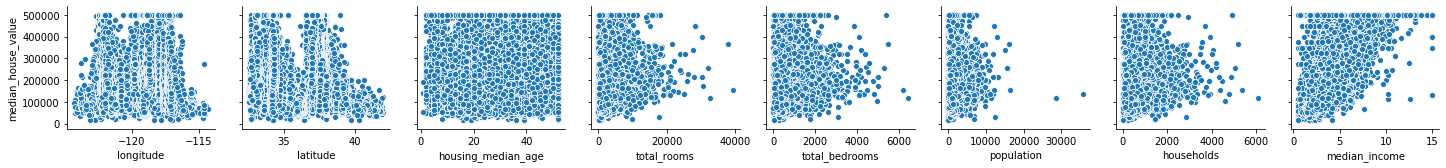

In [6]:
# Draw a pairwise correlation plot between all features and the target "median_house_value"
feature_names = list(housing.columns)[0:8]
sns.pairplot(data=housing, y_vars=['median_house_value'], x_vars=feature_names);

In [7]:
# Compute coefficients between all features and the target "median_house_value"
housing[housing.columns[0:9]].corr()['median_house_value'][0:8]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
Name: median_house_value, dtype: float64

From the plot above, we can find correlations between all features and the target **median_house_value** are very low. Only the feature **median_income** has a relatively obvious increasing trend in the plot. From the coefficients we compute, the conclusion keeps the same. We have a initial guessing that **median_income** may have a strong correlation with the target. 

### 3. Actions to prepare the data set for learning

##### (1) Exploring correlations among features and all features' distrributions under each class of "ocean_proximity": 
In the Part 2, we can only find the correlation between all features and the target. Correlations among features are also very important for us because we can try to combine original ones or extract new ones with such information. Besides that, each feature's distribution under each **ocean_proximity** class can provide additional information besides the overall distribution. 

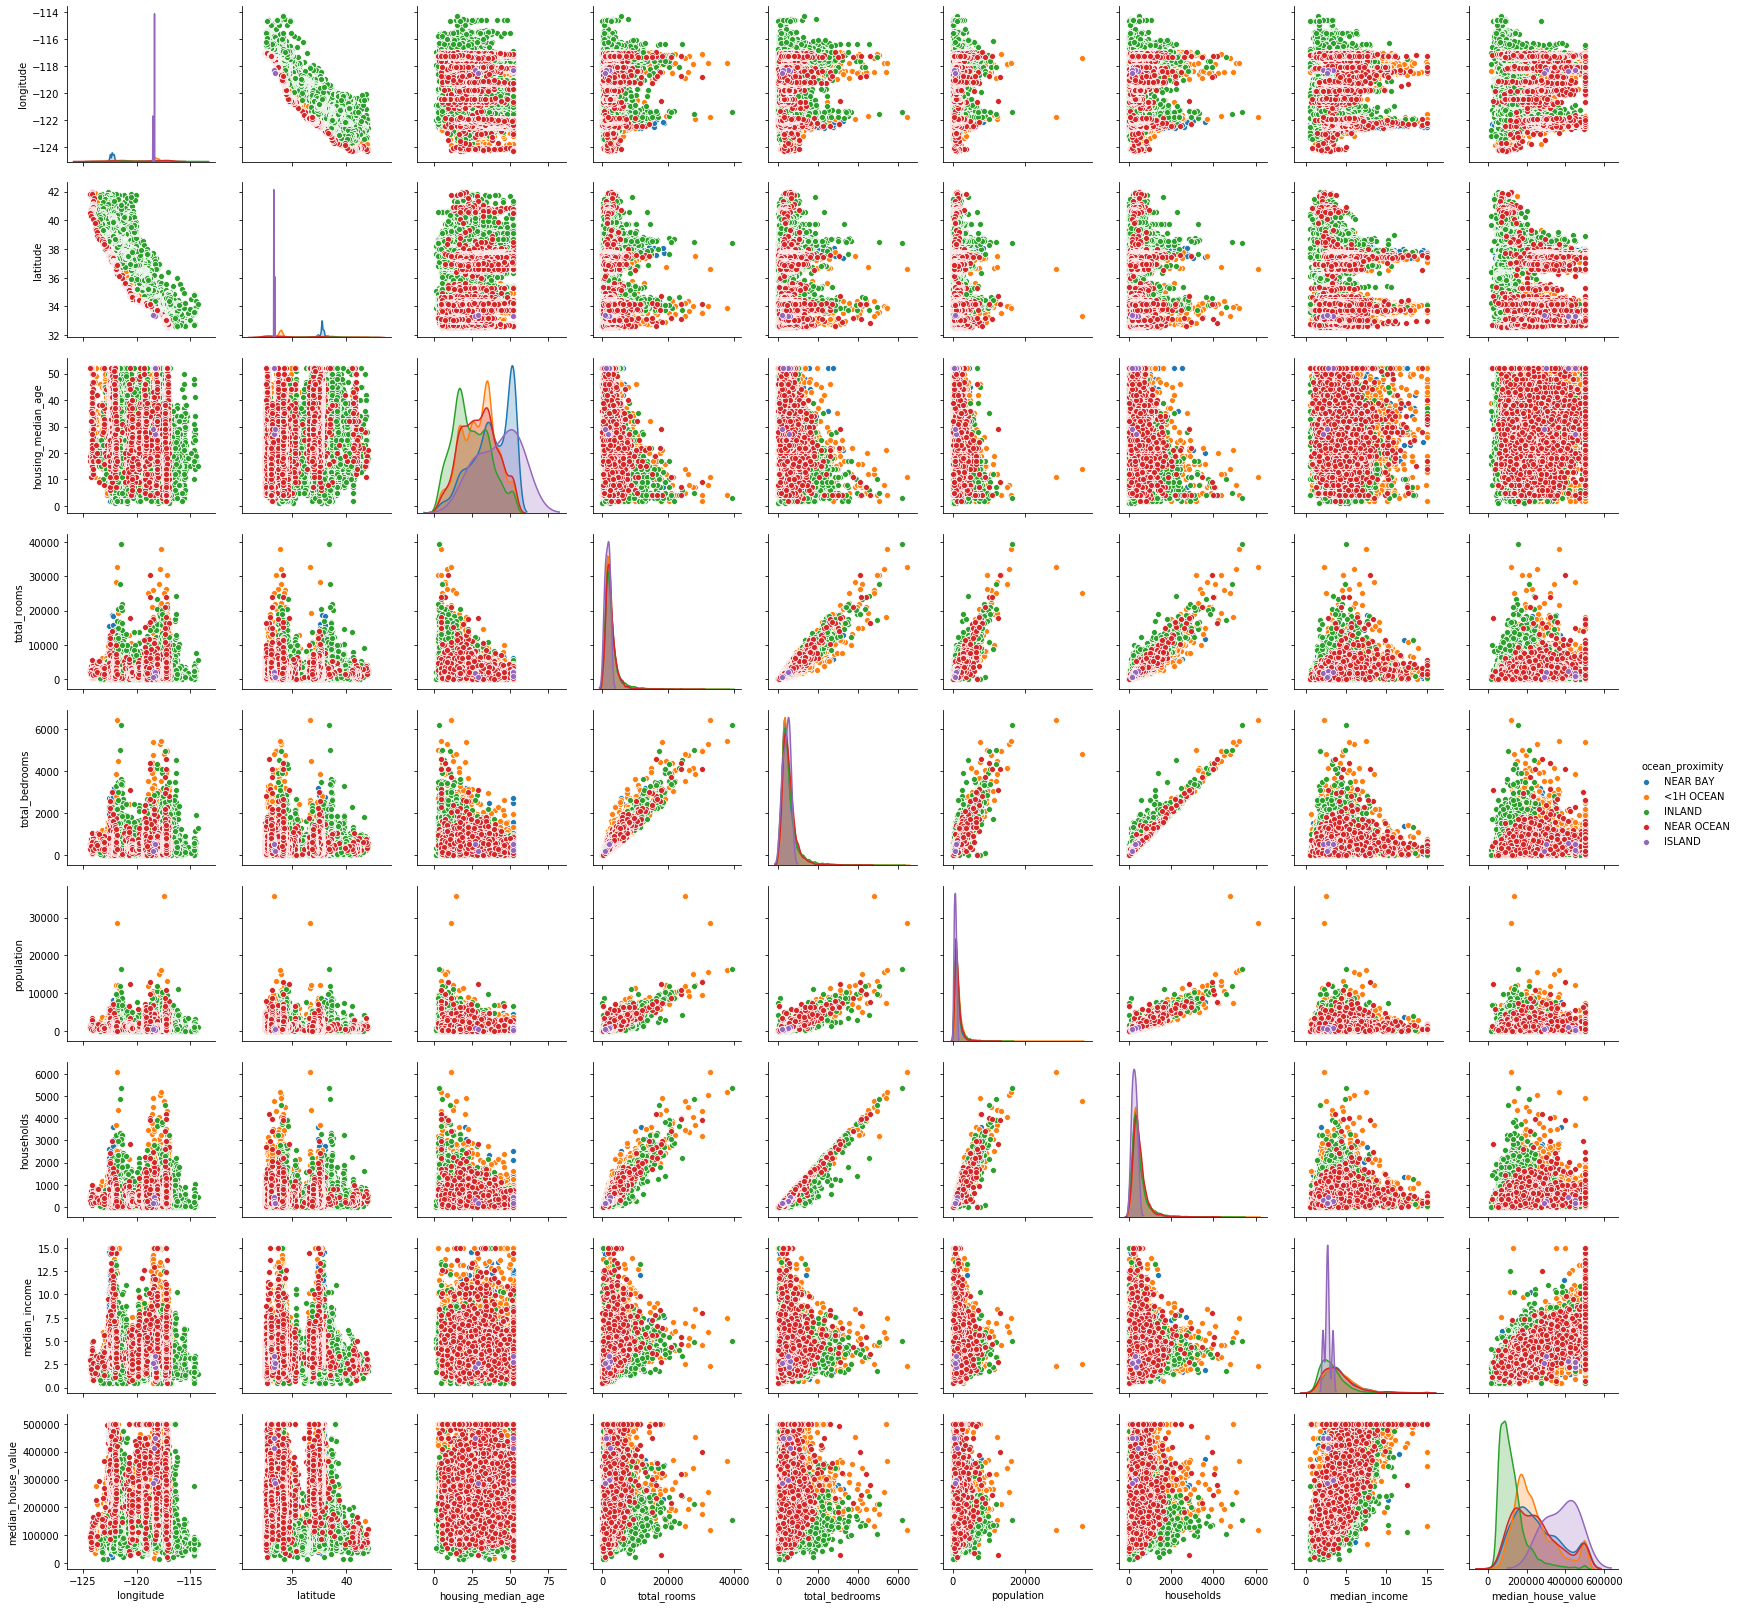

In [8]:
# Draw a pairwise correlation plot among all features, including the target "median_house_value"
sns.pairplot(housing, hue='ocean_proximity');

This giant plot gives us detail distributions for all features grouped by **ocean_proximity**. Features including **total_rooms**, **total_bedrooms**, **population**, and **households** are strongly correlated. The last distribution density plot is also very interesting since it shows how the target is distributed under each **ocean_proximity** class. We seperate this plot from it and place it together with the distribution density plot of the target in the 4th action. This can provide us new insights to deal with the categorical variable. 

##### (2) Select useful features to simplfy the feature matrix: 
When drawing **longitude** and **latitude** together in the correlation plot, we actually get a map showing the geospacial information. Therefore, these two features should not be put in our model. Besides that, in the plot below, we can also see the distributions of 5 **ocean_proximity** sub-classes are closely related with geospatial information. So we only need to deal with **ocean_proximity** and cast these two geospatial features away. 

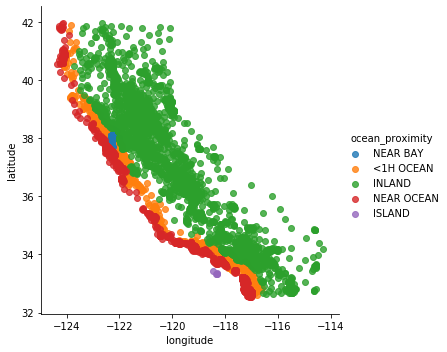

In [9]:
# Draw a map to show how 5 ocean_proximity categoties are distributed
sns.lmplot('longitude', 'latitude', data=housing, hue='ocean_proximity', fit_reg=False);

##### (3) Preprocess features with wide ranges or big skews: 
From the above, we have known that all features are with wide range and 5 of them are hugely skewed. In order to keep our model stable, we need to scale all features and make them standardized. After that, their boxplots showing distributions can be presented in the same plot. 

This seperate plot can show us the skewness more clearly. For these highly skewed features, we need to use logarithm to transform them normal so that the modeling can perform better. 

In [10]:
# Scale all features
scaler = StandardScaler()

feature = housing.iloc[:, 2:8]
target = housing.iloc[:, 8]

feature_scaled = scaler.fit_transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns = feature_names[2:])

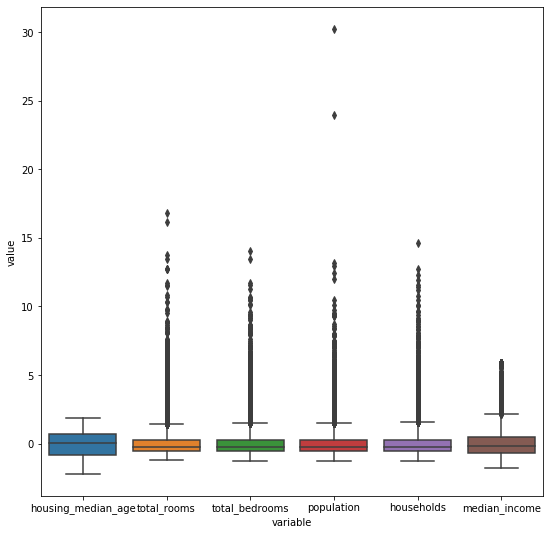

In [11]:
# Draw boxplots showing all features' distributions
plt.figure(figsize=(9,9))
sns.boxplot(x='variable', y='value', data=pd.melt(feature_scaled));

##### (4) Transform the categorical variable: 
For the categorical variable **ocean_proximity**, one-hote encoding is extremly useful for the nominal variable. Besides that, from the plot below, we can find the target's distributions under **NEAR OCEAN**, **NEAR BAY** and **<1H OCEAN** are nearly identical with the target's overall distribution. We may have one assumption that all these thress sub-classes can be regarded as a whole. Therefore, except for the one-hot encoding, we can also reduce 5 categories to 3 for the ease of computation in the modeling. 

**Note: In this PS, we will only use one-hot endoding in the following part. But we may try to reduce sub-class number later.**

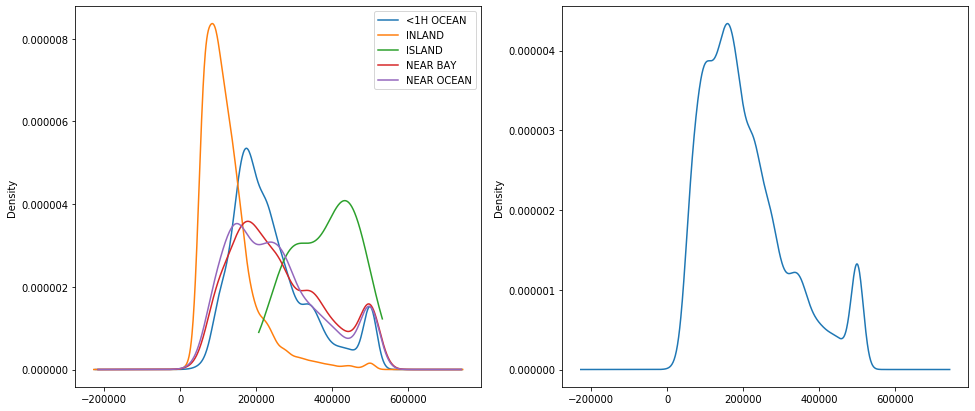

In [12]:
# Draw the target's distribution under sub-classes of "ocean_proximity"
plt.figure(figsize=(16,7))
plt.subplot(121)
housing.groupby('ocean_proximity').median_house_value.plot(kind='kde', legend=True);
plt.subplot(122)
housing.median_house_value.plot(kind='kde');

In [13]:
# One-hot endoding for "ocean_proximity"
ocean_proximity_array = np.array(housing['ocean_proximity'])

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(ocean_proximity_array)

onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
ocean_proximity_onehot_array = onehot_encoder.fit_transform(integer_encoded)
ocean_proximity_lable = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

ocean_proximity_onehot = pd.DataFrame(ocean_proximity_onehot_array, columns = ocean_proximity_lable)
ocean_proximity_onehot.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


##### (5) Combine original features for new feature extraction: 
From the 1st action, we have known that **total_rooms**, **total_bedrooms**, **population**, and **households** are strongly correlated. Therefore, we can use these 4 features to extract new feature, which will be finished in the Part 5. 

### 4. Data preprocessing

As said above, we will use logrithm to preprocess our skewed features. 

In [14]:
# Use logrithm to erase features' skewness
feature_logged = np.log(feature.iloc[:, 1:])

In [15]:
# Scale logged features
feature_transformed = scaler.fit_transform(feature_logged)
feature_transformed = pd.DataFrame(feature_transformed, columns = feature_names[3:])

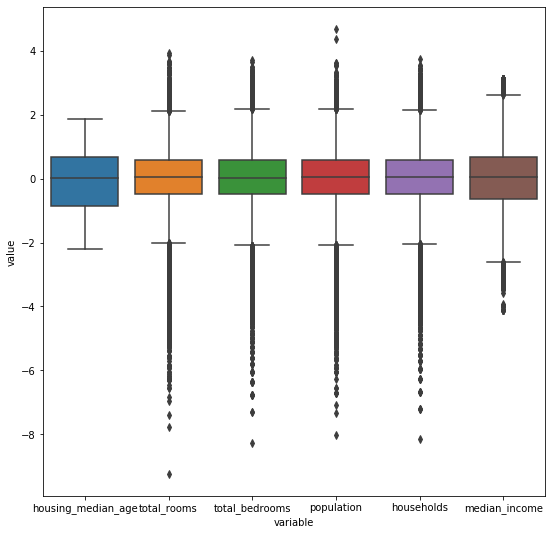

In [16]:
# Draw boxplots showing all transformed features' distributions
feature_transformed = pd.concat([pd.DataFrame(feature_scaled['housing_median_age']), feature_transformed], axis=1)

plt.figure(figsize=(9,9))
sns.boxplot(x='variable', y='value', data=pd.melt(feature_transformed));

After preprocessing, we can see their distributions become closer to normal distributions. After that, we append previous one-hot encoded variable to yield our transformed feature matrix. 

In [17]:
# Append one-hot endoded variables
feature_transformed = pd.concat([feature_transformed, ocean_proximity_onehot], axis=1)
feature_transformed.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982143,-1.129255,-1.625687,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0
1,-0.607019,1.648839,1.306611,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0
2,1.856182,-0.449227,-1.097264,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0
3,1.856182,-0.636925,-0.807183,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0
4,1.856182,-0.311482,-0.568084,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0


In [18]:
# Origianl data set before the cleaning

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 5. New feature extraction

In Part 3, we have known that **total_rooms**, **total_bedrooms**, **population**, and **households** are strongly correlated. So we use them to extract new features below: 
1. **Bedroom rate:** total_bedrooms / total_rooms, the rate of bedrooms in all rooms
1. **Population per household:** population / households, how many people are in one household
1. **Room number per household:** total_rooms / households, how many rooms does each household have
1. **Bedroom number per household:** total_bedrooms / households, how many bedrooms does each household have

In [19]:
# Extract candidate new feat
bedroom_rate = pd.DataFrame(housing['total_bedrooms']/housing['total_rooms'], columns=['bedroom_rate'])
pop_per_house = pd.DataFrame(housing['population']/housing['households'], columns=['pop_per_house'])
room_per_house = pd.DataFrame(housing['total_rooms']/housing['households'], columns=['room_per_house'])
bedroom_per_house = pd.DataFrame(housing['total_bedrooms']/housing['households'], columns=['bedroom_per_house'])

new_feature = pd.concat([bedroom_rate, pop_per_house, room_per_house, bedroom_per_house, target], axis=1)

In [20]:
# Compute coefficients between candidate features and the target "median_house_value"
new_feature.corr()['median_house_value'][0:4]

bedroom_rate        -0.255880
pop_per_house       -0.023737
room_per_house       0.151948
bedroom_per_house   -0.046739
Name: median_house_value, dtype: float64

According to coefficients above, we can find **bedroom_rate** and **room_per_house** have relatively high correlation with the target. So we add these two into our feature matrix. 

In [21]:
# Produce the final feature matrix for modeling
new_feature = new_feature[['bedroom_rate', 'room_per_house']]
features_final = pd.concat([feature_transformed, new_feature], axis=1)
features_final.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_rate,room_per_house
0,0.982143,-1.129255,-1.625687,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,0.146591,6.984127
1,-0.607019,1.648839,1.306611,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,0.155797,6.238137
2,1.856182,-0.449227,-1.097264,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,0.129516,8.288136
3,1.856182,-0.636925,-0.807183,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,0.184458,5.817352
4,1.856182,-0.311482,-0.568084,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,0.172096,6.281853


### 6. Model evaluation

In [22]:
# Split data set according to the rule: 80% for training, 20% for test
X_train, X_test, y_train, y_test = train_test_split(features_final, target, test_size=0.2, random_state=0)
X_train.fillna(method = 'ffill', inplace = True)
X_test.fillna(method = 'ffill', inplace = True)

In [23]:
# Training set dimension
X_train.shape

(16512, 13)

In [24]:
# Test set dimension
X_test.shape

(4128, 13)

In [25]:
# Fit the training set in a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Yield training RMSE
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE for training:', train_rmse)

RMSE for training: 72024.55958496337


In [27]:
# Yield test RMSE
y_test_pred = lm.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for test:', test_rmse)

RMSE for test: 72191.0545703648


In [28]:
# Yield training R^2
train_r2 = lm.score(X_train, y_train)
print('R-sq for training:', train_r2)

R-sq for training: 0.6123993090217383


In [29]:
# Yield training R^2
test_r2 = lm.score(X_test, y_test)
print('R-sq for test:', test_r2)

R-sq for test: 0.6003275611196475


### 7. Data regularization

In order to find a proper value of $\lambda$, we use grid search to yield the best lambda. 

In [30]:
# Implement grid search to find the best regularization lambda
grid = GridSearchCV(Ridge(), {'alpha': np.logspace(-3, 2, num=6)}, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
# Yield the best lamda from the grid search
grid.best_params_

{'alpha': 0.1}

After getting the best $\lambda$ value, we fit the ridge regression model with the training set. 

In [33]:
# Fit the training set in a regularized linear regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
# Yield training RMSE
y_train_pred = ridge.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE for training:', train_rmse)

RMSE for training: 72024.76683686273


In [35]:
# Yield test RMSE
y_test_pred = ridge.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for test:', test_rmse)

RMSE for test: 72184.12591481514


In [36]:
# Yield training R^2
train_r2 = ridge.score(X_train, y_train)
print('R-sq for training:', train_r2)

R-sq for training: 0.6123970783633228


In [37]:
# Yield training R^2
test_r2 = ridge.score(X_test, y_test)
print('R-sq for test:', test_r2)

R-sq for test: 0.6004042758813102


From evaluations above, we can find nearly no change happens after adding regularization. If with polynomial regression model, the result may get improved. But the pipeline containing both polynomial regression and regularization is so complex that computation time will be extremly long. The grid search for hyperparameters in the pipeline can hardly operated if the hardware can't reach the requirements. I tried this, but my laptop gets stucked all the time. So I have to give it up.  

### 8. New Trial on Decision Tree Regression

In [39]:
# Replace the linear regression model with a tree regression model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
# Yield training RMSE
y_train_pred = tree.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE for training:', train_rmse)

RMSE for training: 0.0


In [41]:
# Yield test RMSE
y_test_pred = tree.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for test:', test_rmse)

RMSE for test: 86339.84120645977


In [42]:
# Yield training R^2
train_r2 = tree.score(X_train, y_train)
print('R-sq for training:', train_r2)

R-sq for training: 1.0


In [43]:
# Yield training R^2
test_r2 = tree.score(X_test, y_test)
print('R-sq for test:', test_r2)

R-sq for test: 0.42831088971533


In tree regression model, when fitting the model with traning set, no any error exists and $R^2$ is a perfect 1. However, the $RMSE$ and $R^2$ are worse than the ones from linear regression. Even though Tree regression model makes full use of all data in the training set to produce a model with no error, this model has very low variace resulting in a high overfitting problem. 